In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime 
from salishsea_tools import viz_tools
import cmocean
%matplotlib inline

In [2]:
plt.style.use('/ocean/vdo/MEOPAR/biomodelevalpaper/bioModelEvalPaper.mplstyle')

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
coarseu = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/13apr18/SalishSea_1h_20180413_20180416_grid_U.nc')
coarsev = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/13apr18/SalishSea_1h_20180413_20180416_grid_V.nc')
HS1u = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/13apr18/1_SalishSea_1h_20180413_20180416_grid_U.nc')
HS1v = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/13apr18/1_SalishSea_1h_20180413_20180416_grid_V.nc')
mesh_mask = nc.Dataset('/data/vdo/MEOPAR/grid/mesh_mask201702.nc')
HS1mask = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/13apr18/1_mesh_mask.nc')

In [15]:
grid = nc.Dataset('/data/vdo/MEOPAR/grid/bathymetry_201702.nc')
bathy = grid.variables['Bathymetry'][:]
blats = grid.variables['nav_lat'][:]
blons = grid.variables['nav_lon'][:]

# April 14 - 15, 2018

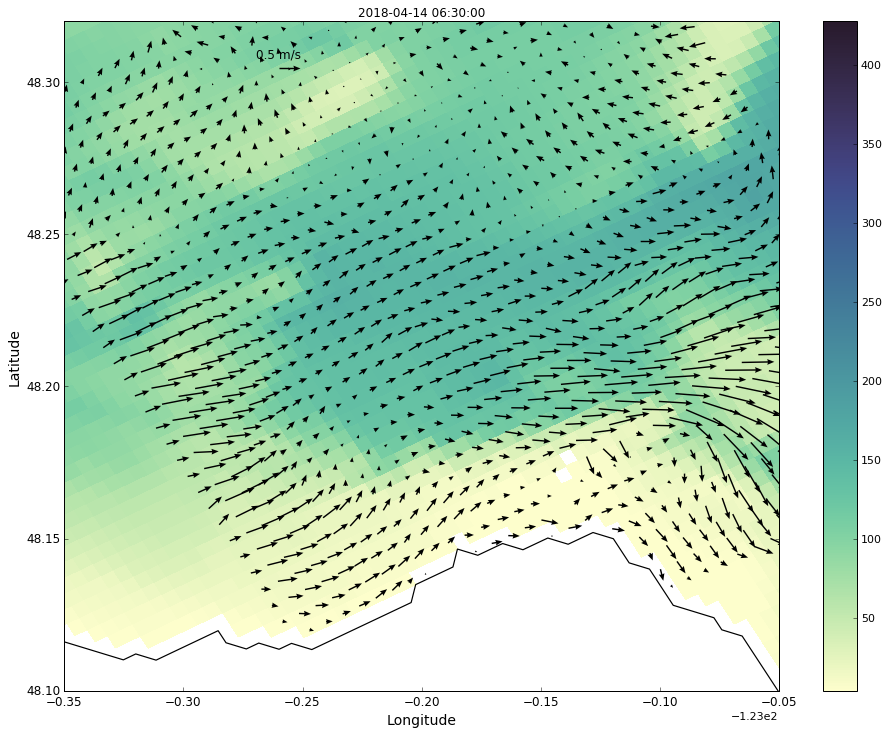

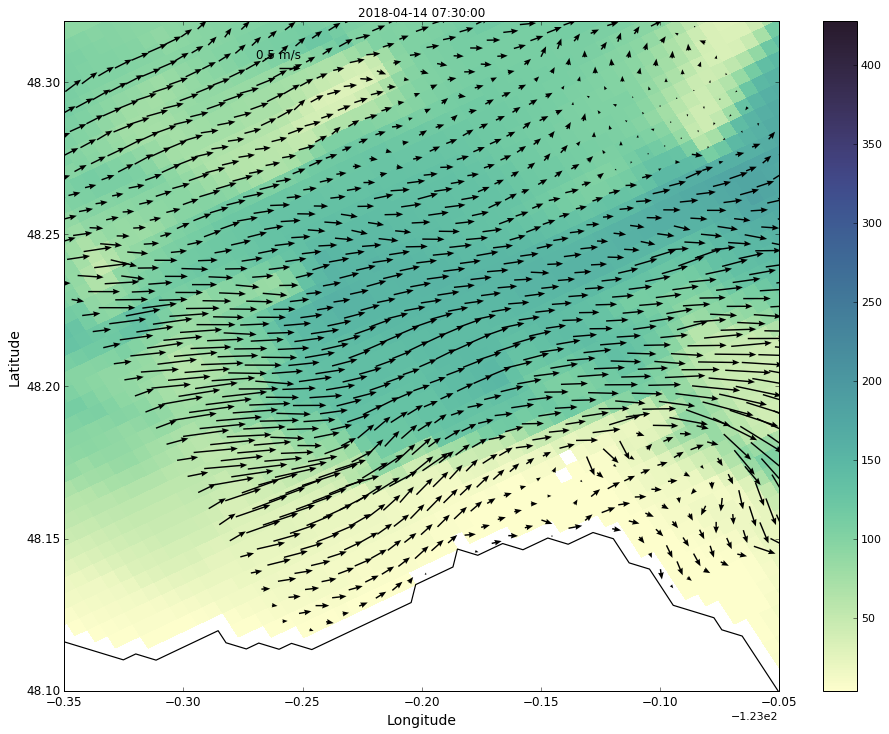

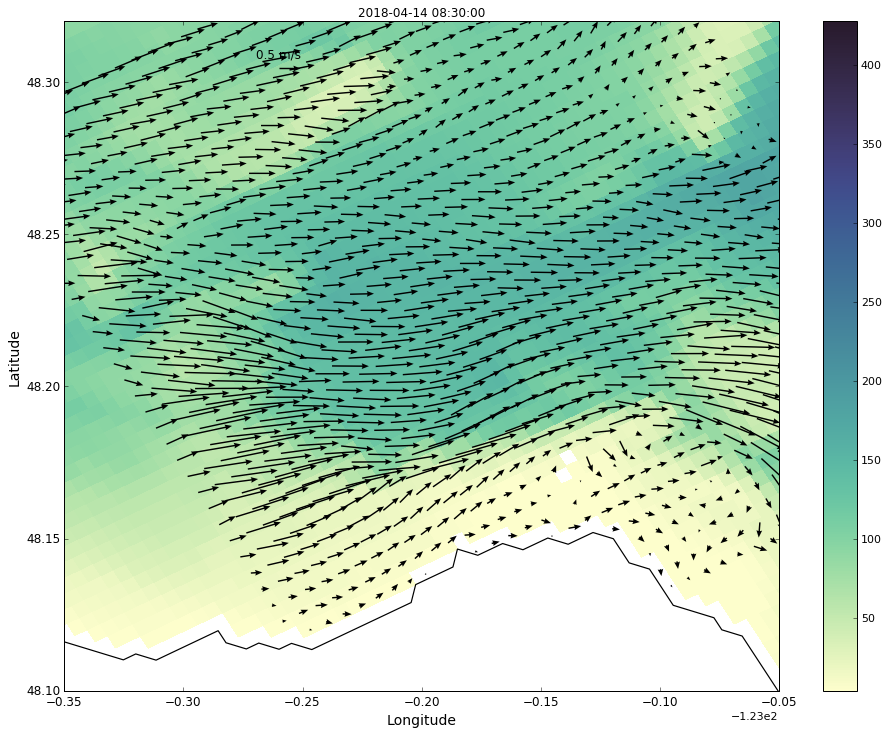

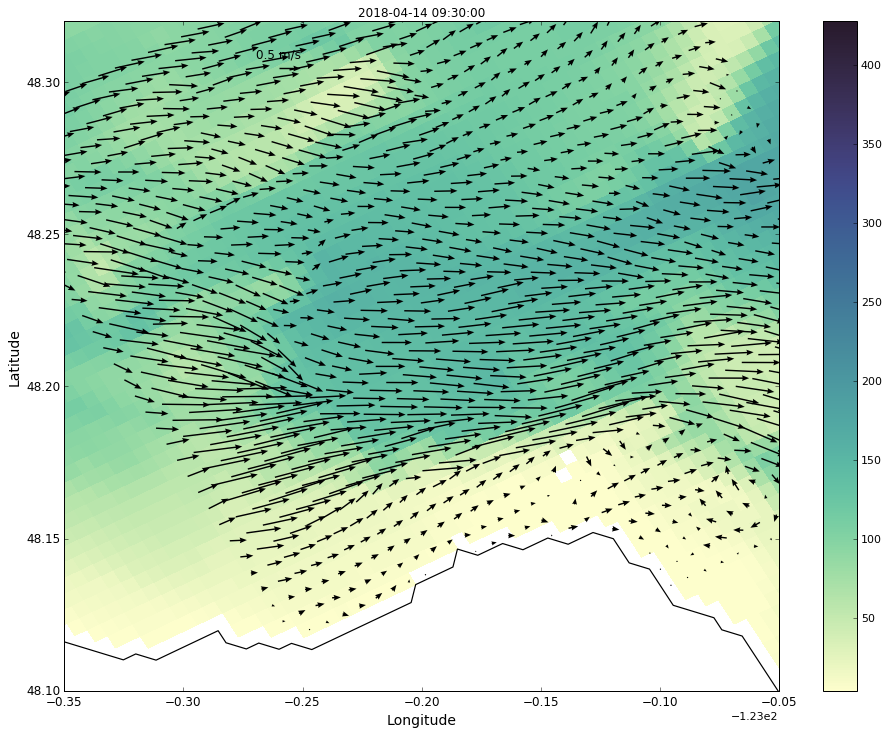

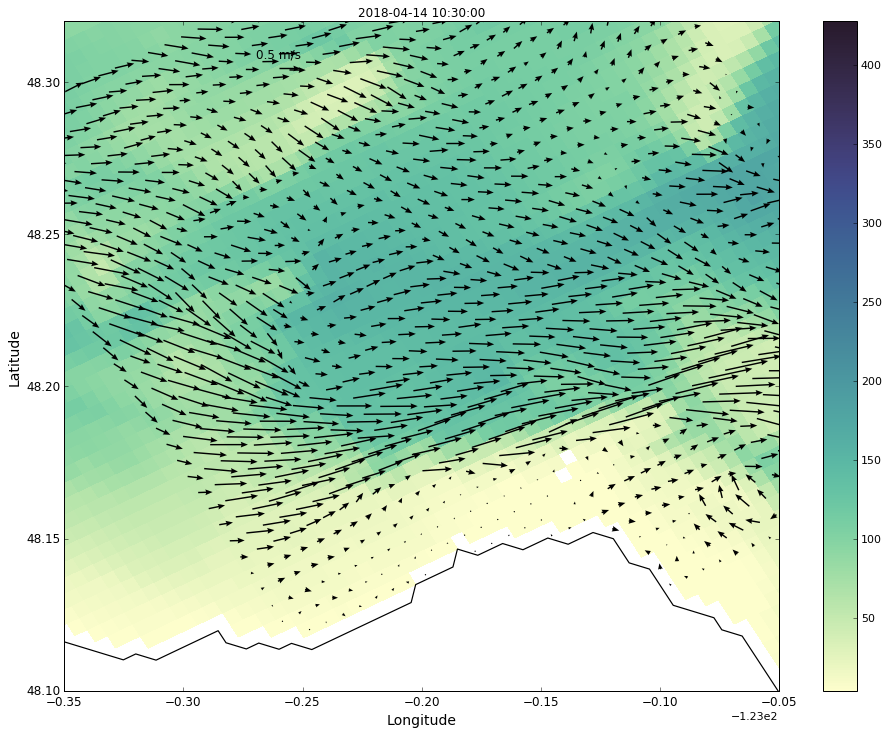

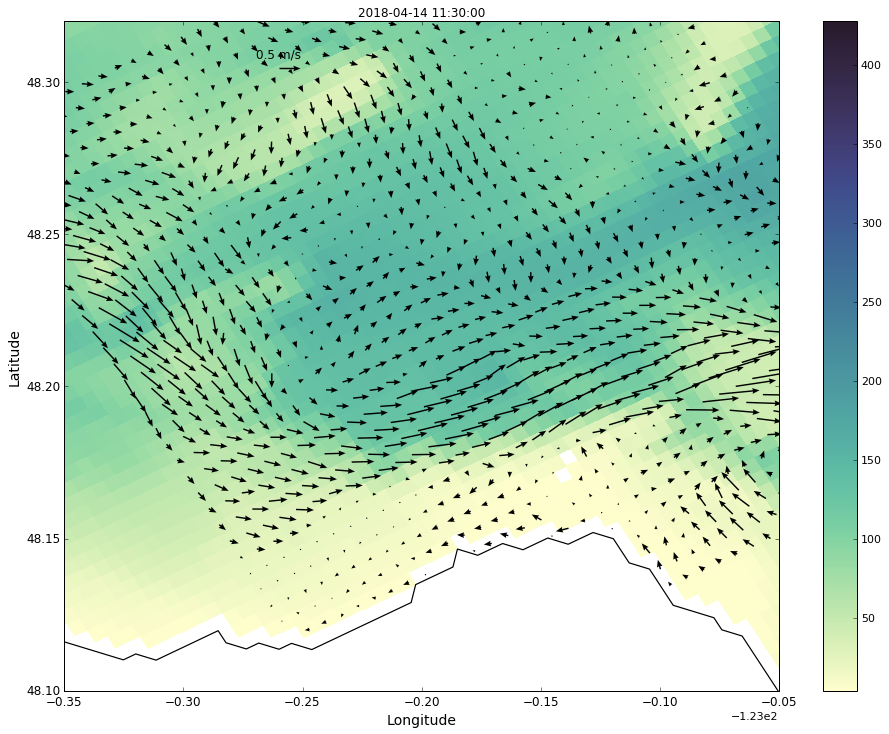

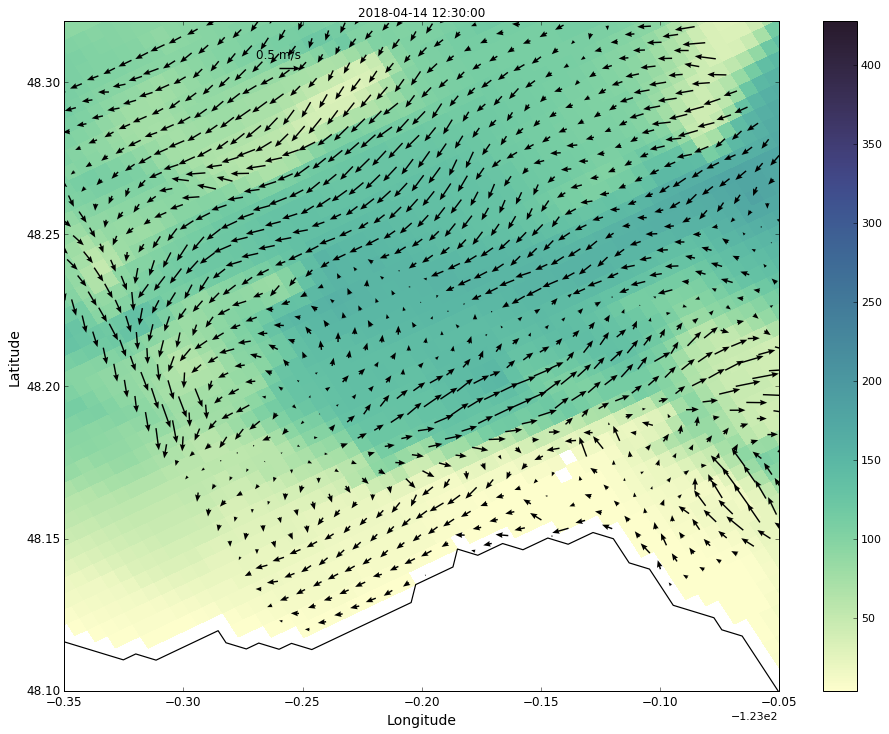

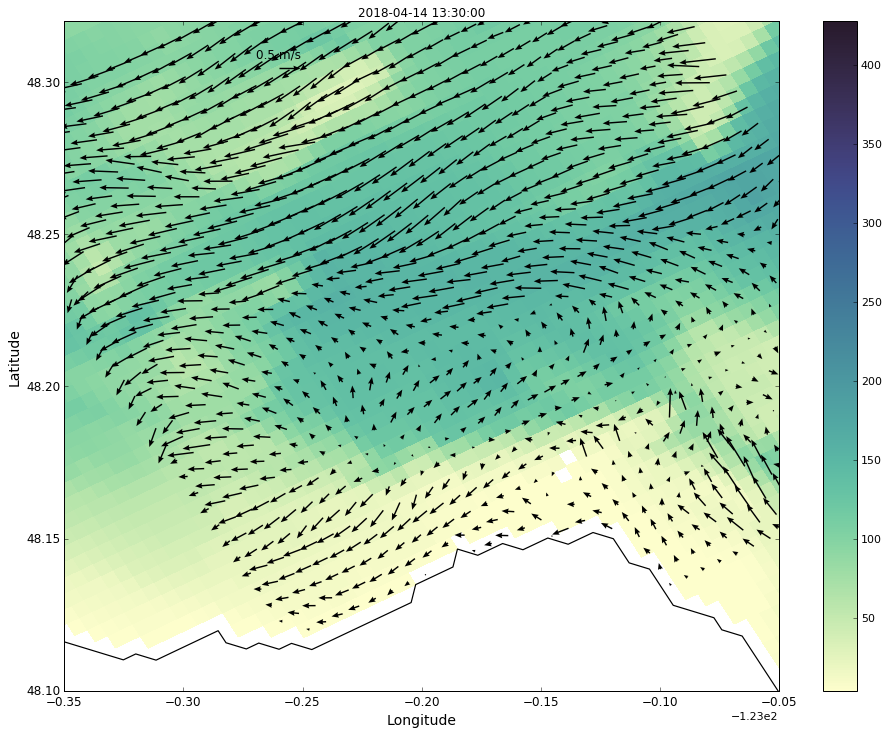

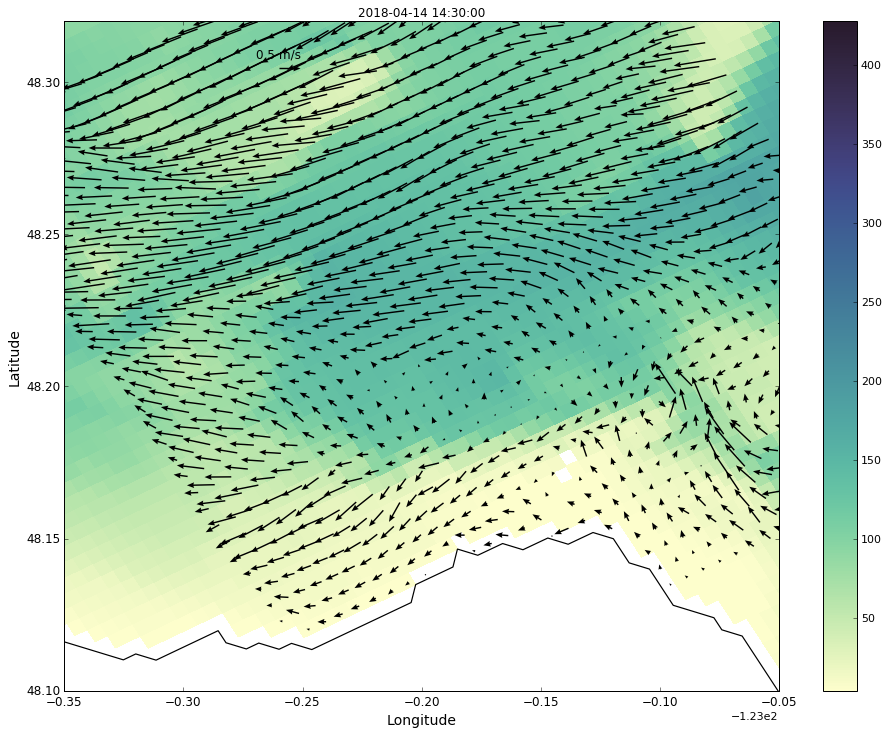

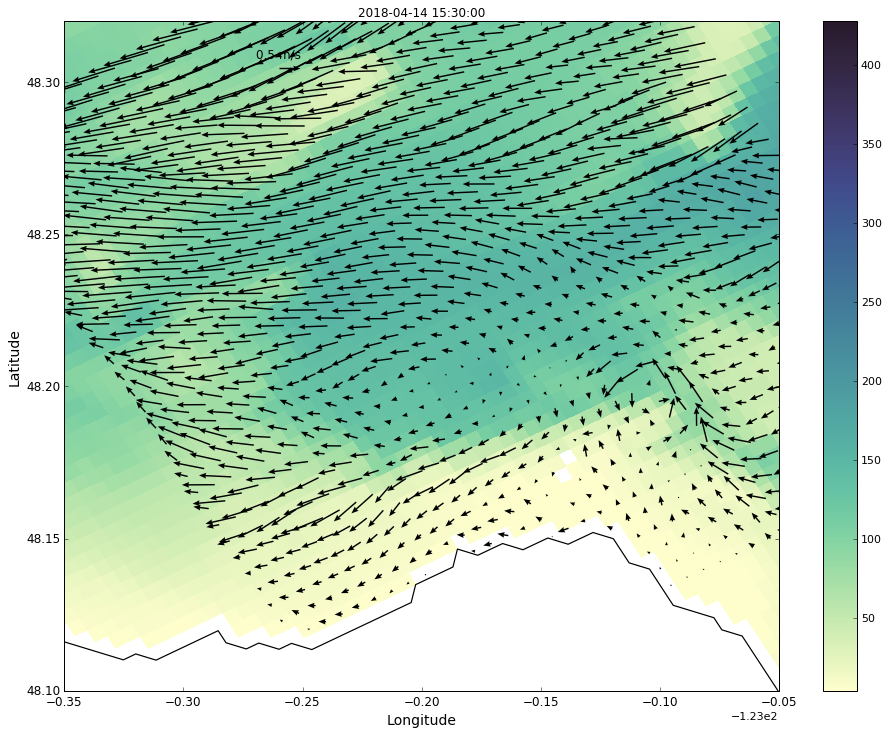

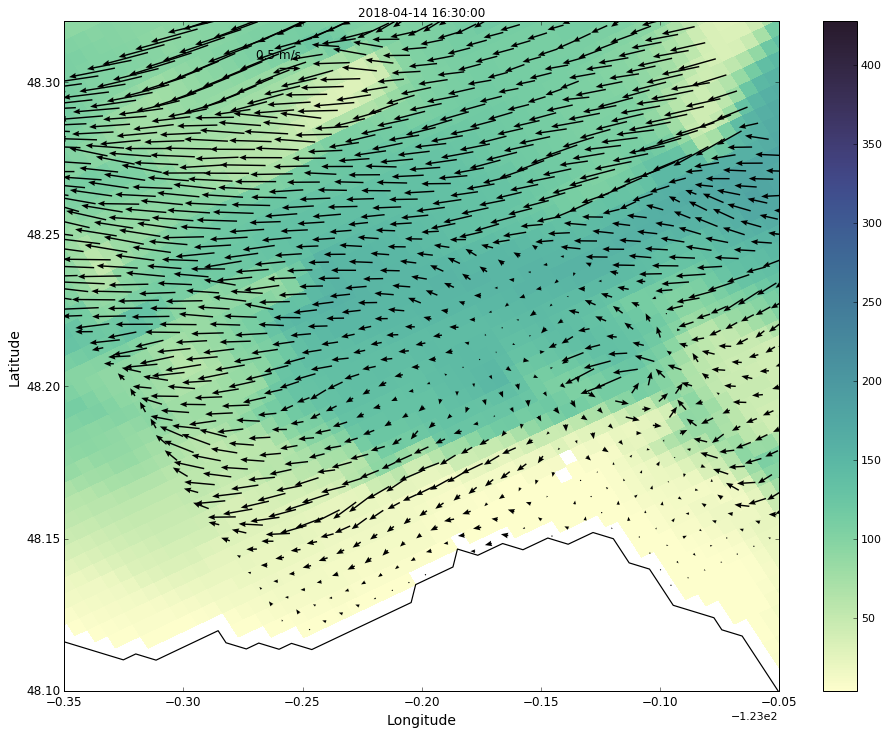

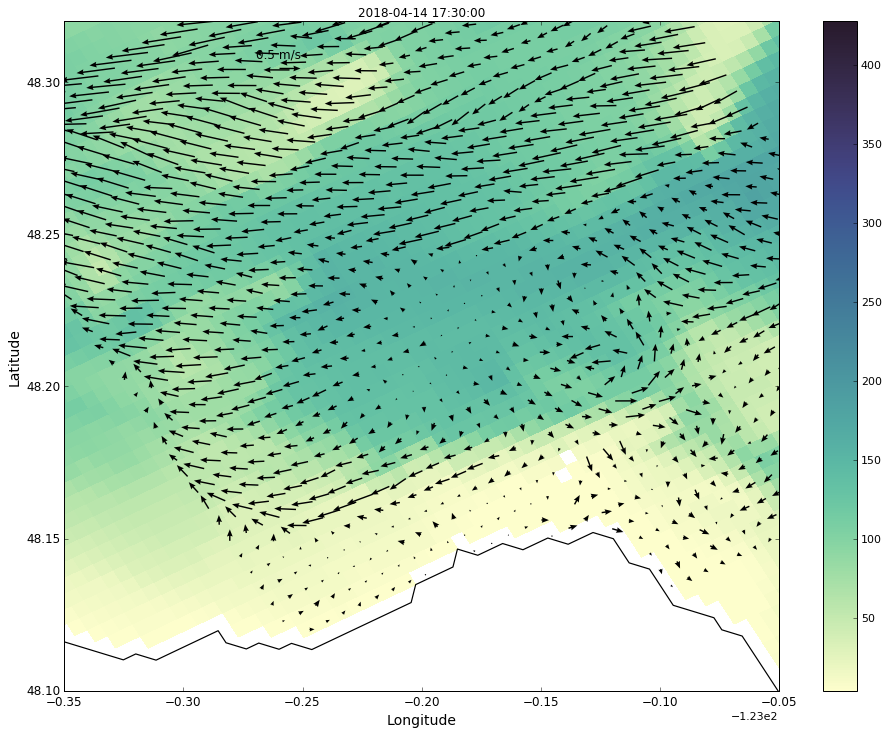

In [17]:
isize = 151
for n in np.arange(30, 42, 1):
    u = np.ma.masked_array(HS1u.variables['vozocrtx'][n, 0, ...],
                           1 - HS1mask.variables['tmask'][0, 0, ...])
    v = np.ma.masked_array(HS1v.variables['vomecrty'][n, 0, ...],
                           1 - HS1mask.variables['tmask'][0, 0, ...])
    fig, ax2 = plt.subplots(figsize=(16, 12))
    mesh = ax2.pcolormesh(blons, blats, bathy, cmap=cmocean.cm.deep)
    fig.colorbar(mesh, ax=ax2)
    u, v = viz_tools.rotate_vel(u, v)
    u, v = viz_tools.unstagger(np.expand_dims(u, 0), np.expand_dims(v, 0))
    Q = ax2.quiver(
        HS1mask.variables['glamt'][0, 1:isize:4, 1:isize:4],
        HS1mask.variables['gphit'][0, 1:isize:4, 1:isize:4],
        np.ma.masked_array(
            u[0, :isize-1:4, :isize-1:4],
            mask=1 - HS1mask.variables['tmask'][0, 0, 1:isize:4, 1:isize:4]),
        np.ma.masked_array(
            v[0, :isize-1:4, :isize-1:4],
            mask=1 - HS1mask.variables['tmask'][0, 0, 1:isize:4, 1:isize:4]),
        scale=17,
        width=0.002,
        headwidth=4)
    Q_key = plt.quiverkey(Q, 0.3, 0.93, 0.5, '0.5 m/s')
    viz_tools.plot_coastline(ax2, grid, coords='map')
    ax2.tick_params(labelsize=12)
    ax2.set_xlabel('Longitude', fontsize=14)
    ax2.set_ylabel('Latitude', fontsize=14)
    ax2.set_ylim(48.1, 48.32)
    ax2.set_xlim(-123.35, -123.05)
    ax2.set_title(
        nc.num2date(HS1u.variables['time_counter'][n], HS1u.variables[
            'time_counter'].units))

In [7]:
coarseu = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/18may18b/SalishSea_1h_20180518_20180521_grid_U.nc')
coarsev = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/18may18b/SalishSea_1h_20180518_20180521_grid_V.nc')
HS1u = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/18may18b/1_SalishSea_1h_20180518_20180521_grid_U.nc')
HS1v = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/18may18b/1_SalishSea_1h_20180518_20180521_grid_V.nc')

# May 19 - 20, 2018

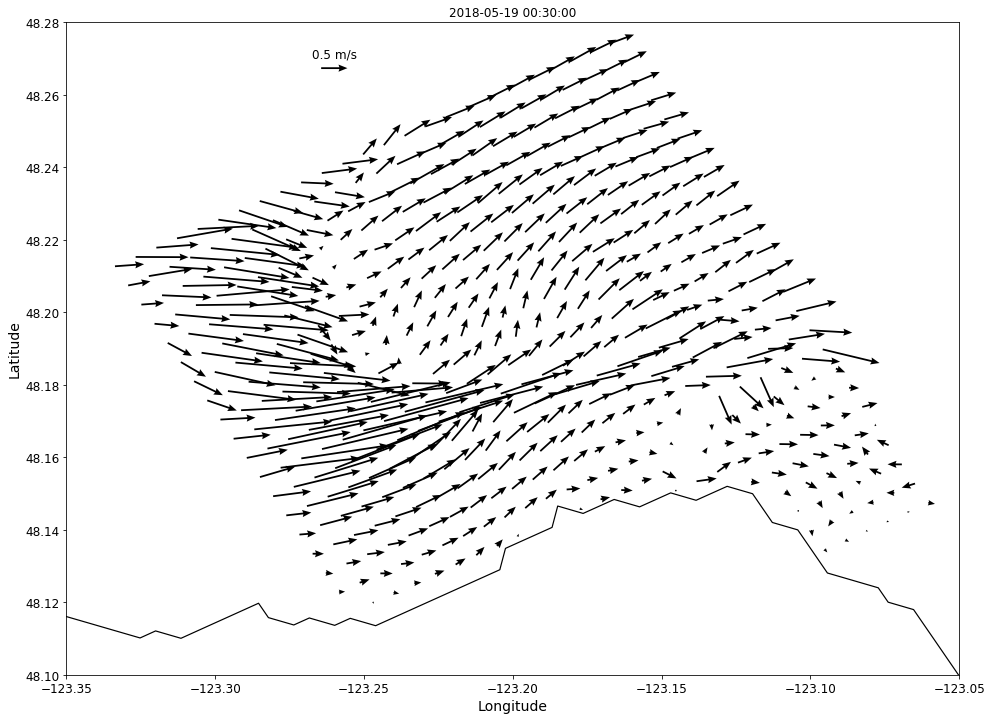

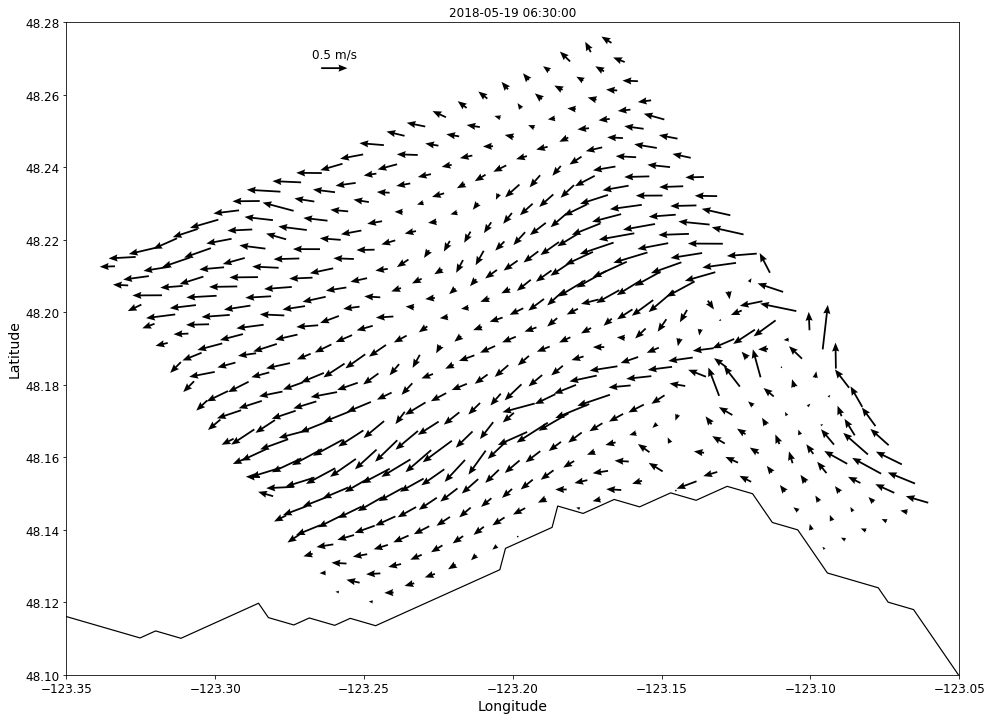

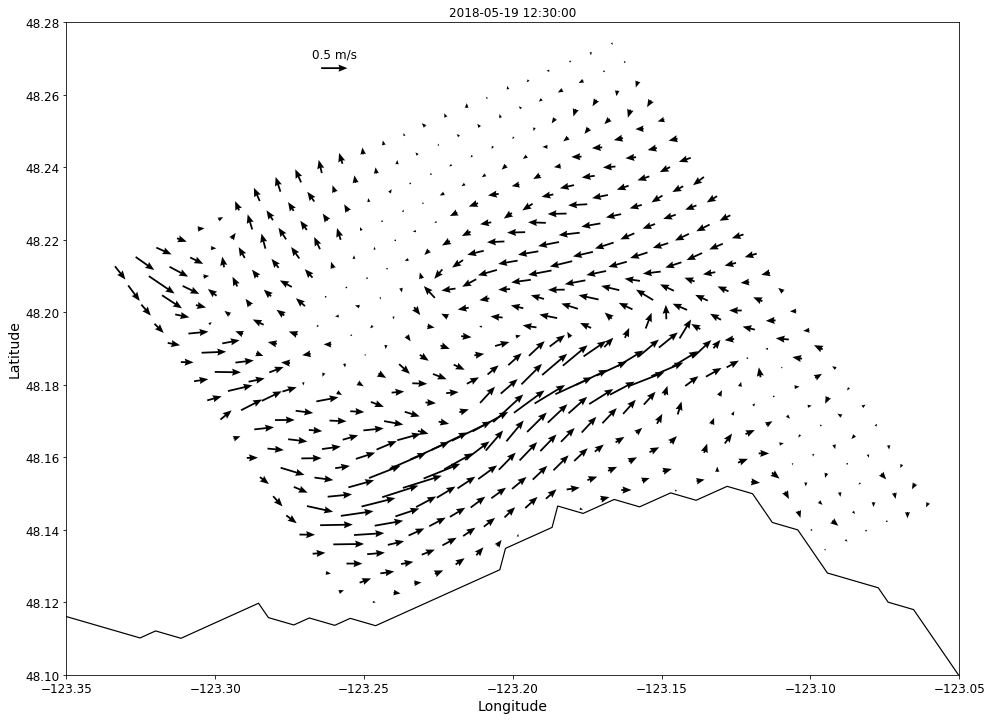

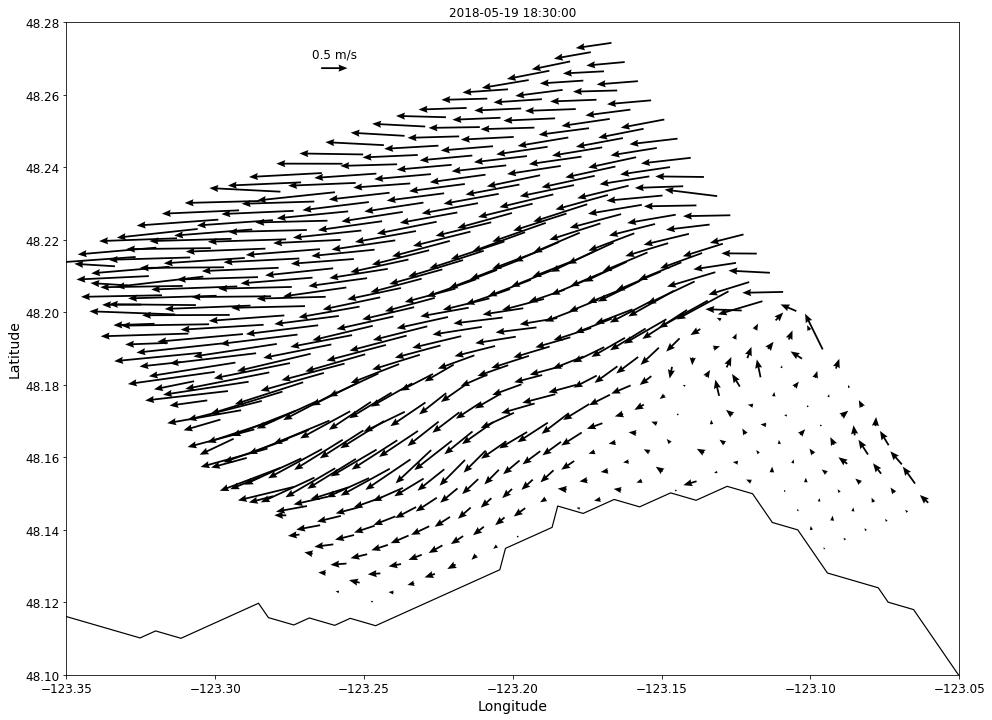

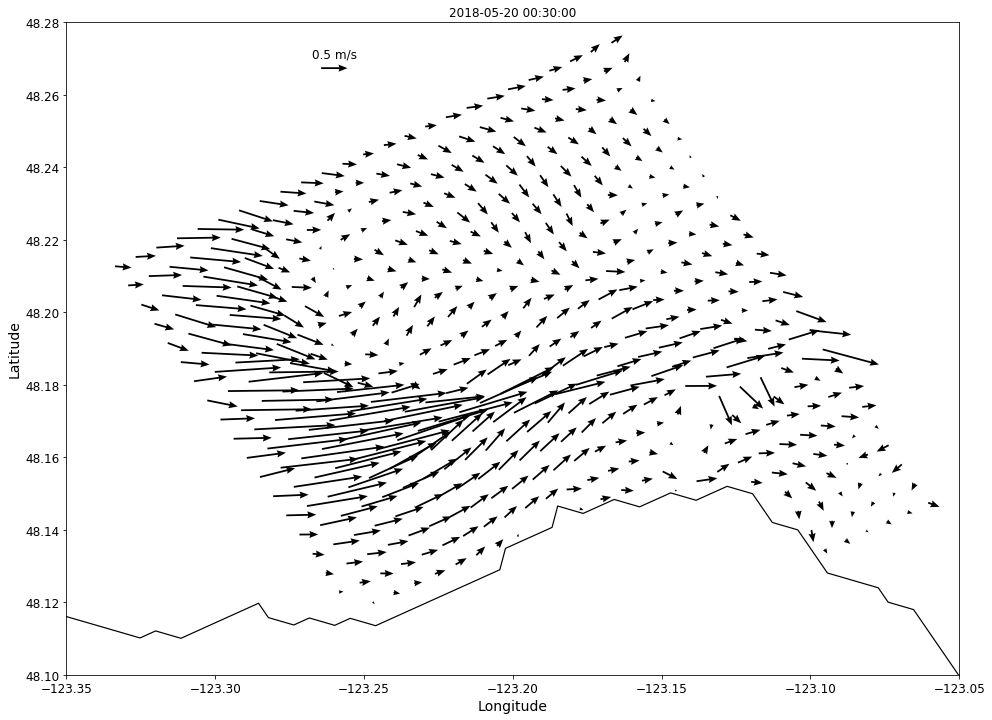

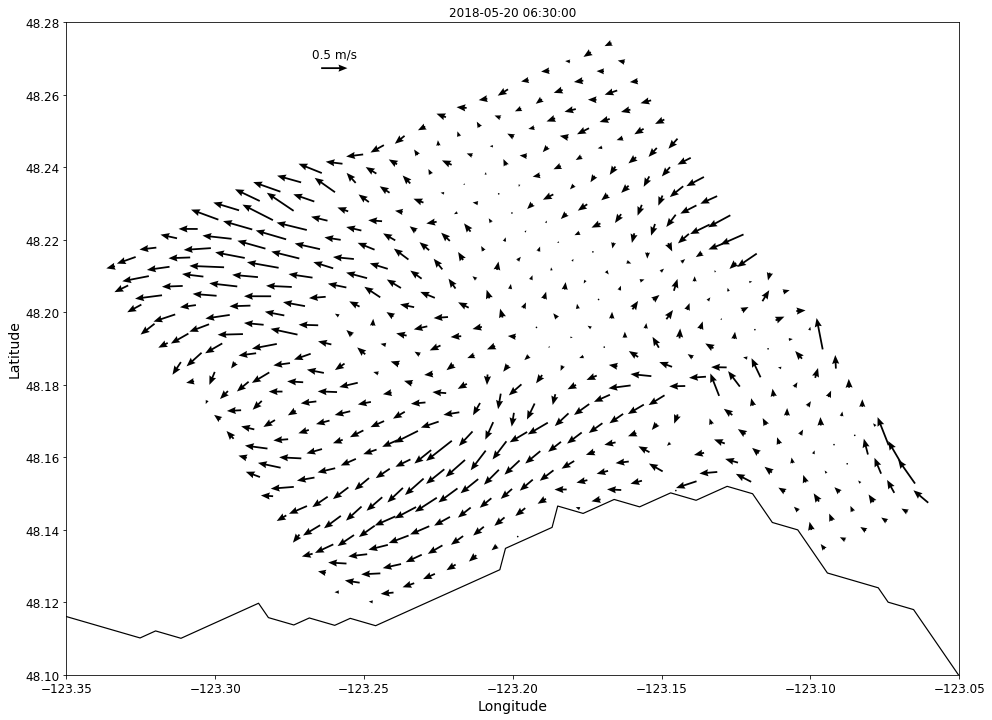

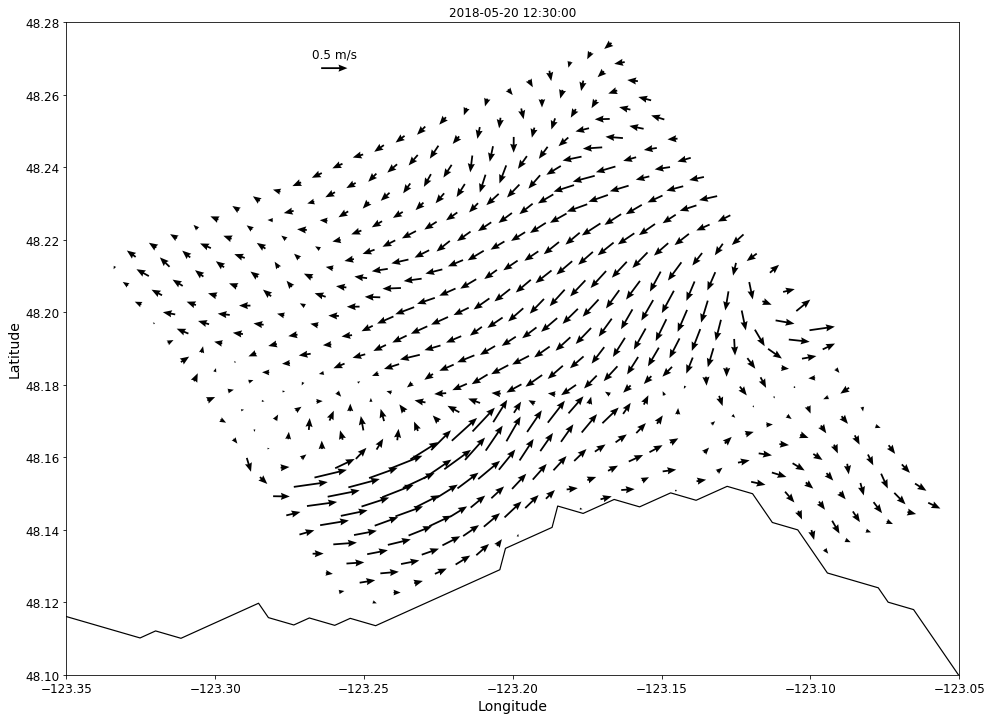

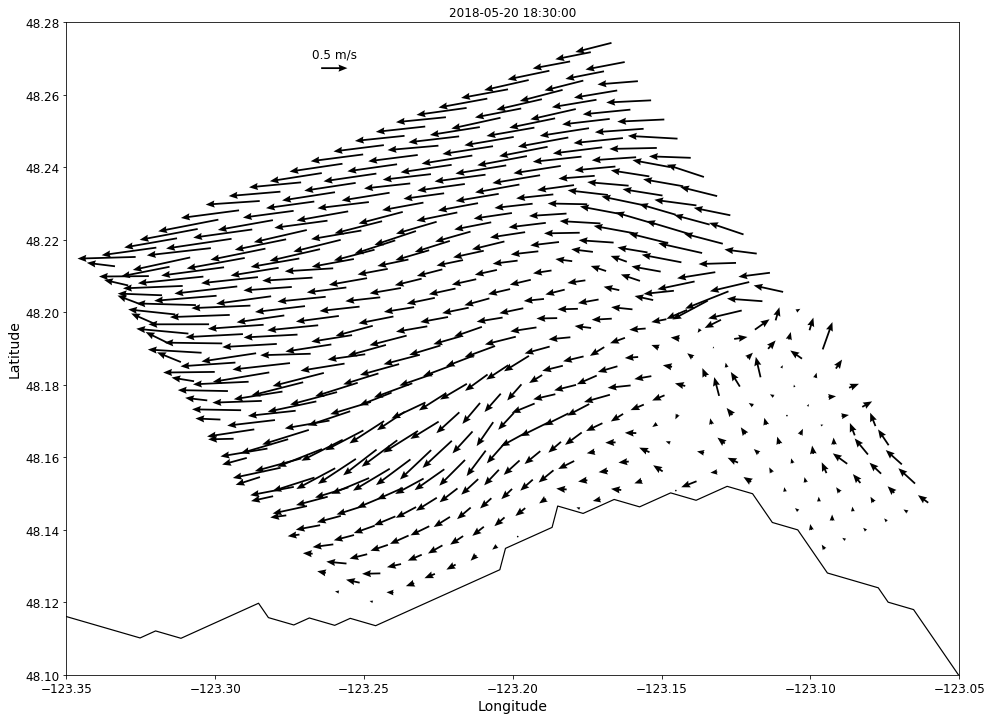

In [8]:
for n in np.arange(24,72,6):
    u = np.ma.masked_array(HS1u.variables['vozocrtx'][n,0,...], 
                        1-HS1mask.variables['tmask'][0,0,...])
    v = np.ma.masked_array(HS1v.variables['vomecrty'][n,0,...], 
                        1-HS1mask.variables['tmask'][0,0,...])
    fig,ax2 = plt.subplots( figsize=(16,12))
    u, v = viz_tools.rotate_vel(u, v)
    u, v = viz_tools.unstagger(np.expand_dims(u, 0), np.expand_dims(v, 0))
    Q=ax2.quiver(HS1mask.variables['glamt'][0, 1:101:4, 1:101:4],
                 HS1mask.variables['gphit'][0, 1:101:4, 1:101:4],
                 np.ma.masked_array(u[0,:100:4, :100:4], 
                    mask = 1 - HS1mask.variables['tmask'][0,0,1:101:4, 1:101:4]), 
                 np.ma.masked_array(v[0,:100:4, :100:4], 
                    mask = 1 - HS1mask.variables['tmask'][0,0,1:101:4, 1:101:4]),
                 scale=17, width=0.002, headwidth=4)
    Q_key = plt.quiverkey(Q, 0.3, 0.93, 0.5, '0.5 m/s')
    viz_tools.plot_coastline(ax2, grid, coords = 'map')
    ax2.tick_params(labelsize=12)
    ax2.set_xlabel('Longitude', fontsize=14)
    ax2.set_ylabel('Latitude', fontsize=14)
    ax2.set_ylim(48.1, 48.28)
    ax2.set_xlim(-123.35, -123.05)
    ax2.set_title(nc.num2date(HS1u.variables['time_counter'][n],
                              HS1u.variables['time_counter'].units));

In [9]:
coarseu = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/25may18/SalishSea_1h_20180525_20180528_grid_U.nc')
coarsev = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/25may18/SalishSea_1h_20180525_20180528_grid_V.nc')
HS1u = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/25may18/1_SalishSea_1h_20180525_20180528_grid_U.nc')
HS1v = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/25may18/1_SalishSea_1h_20180525_20180528_grid_V.nc')

# May 26 - 27, 2018

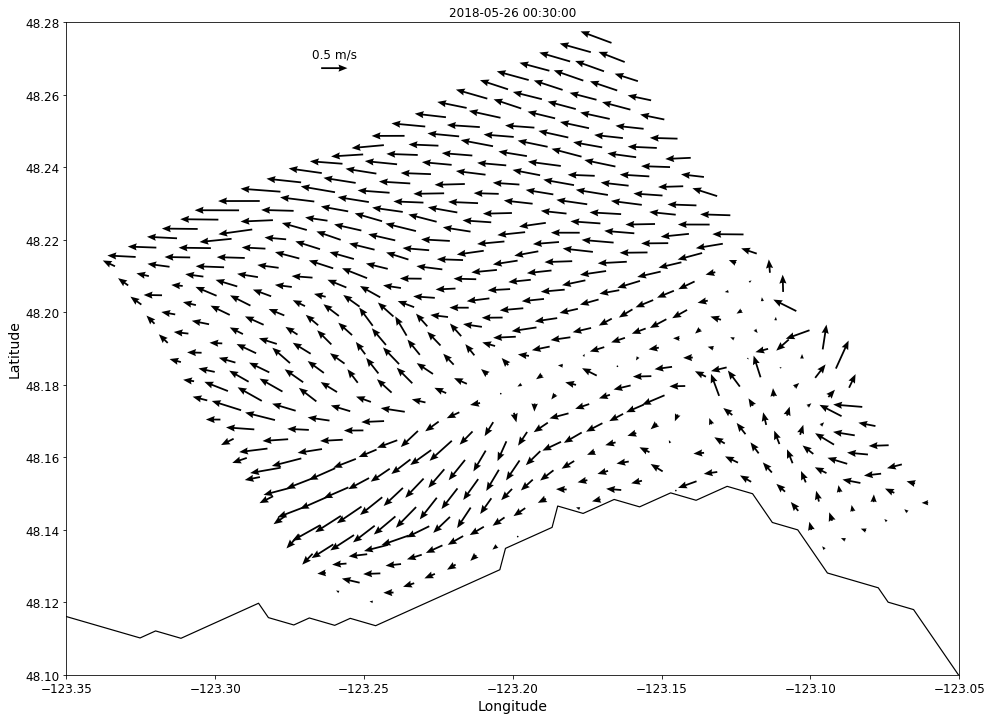

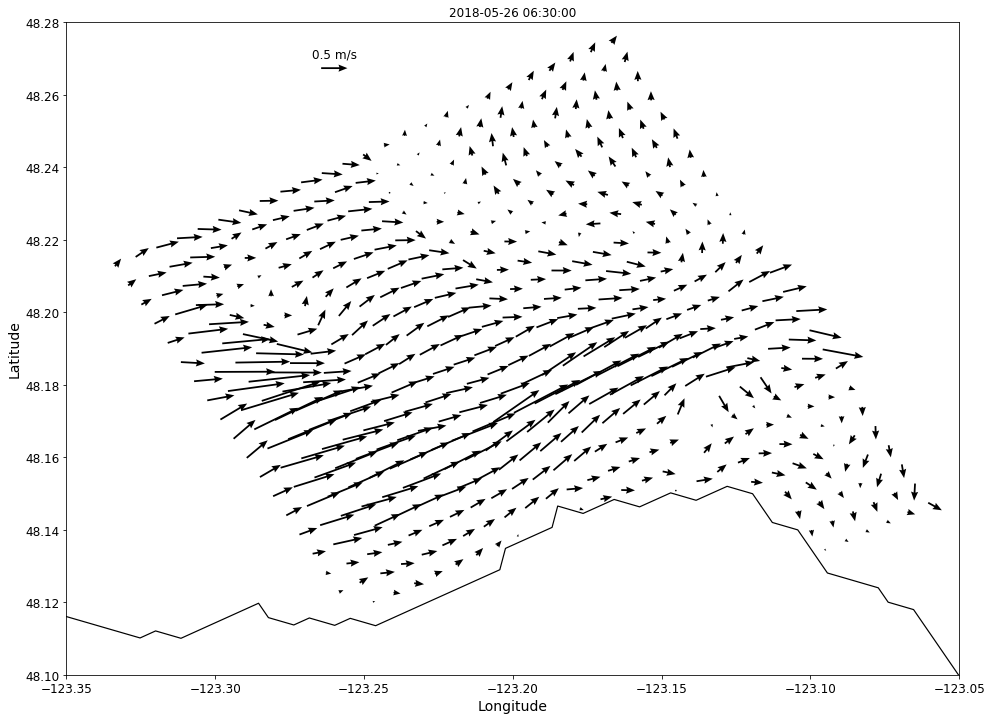

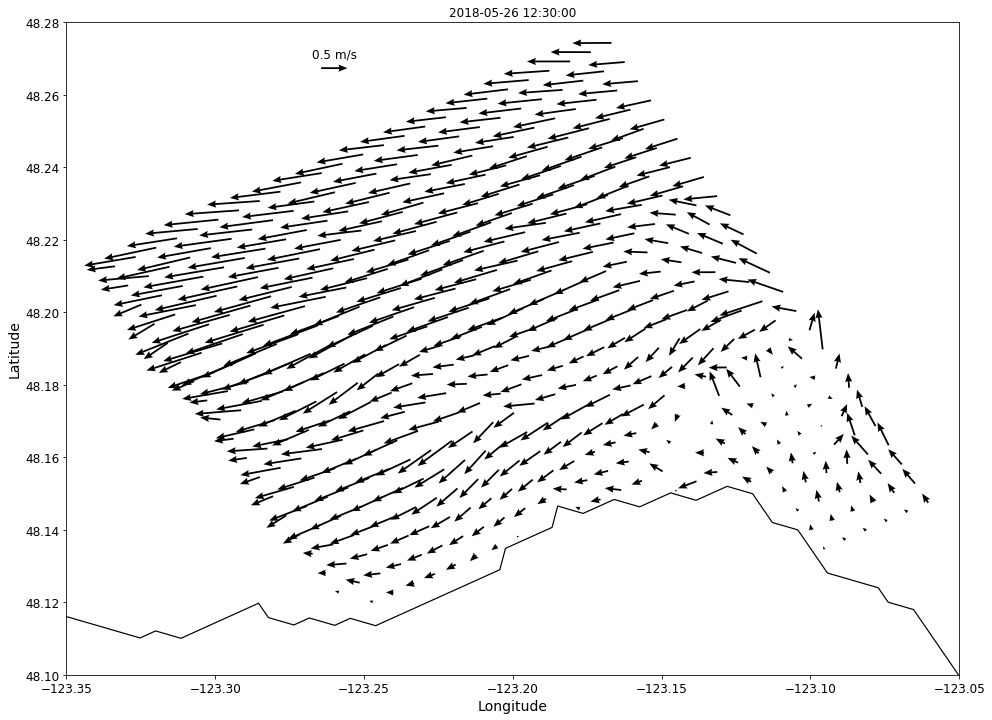

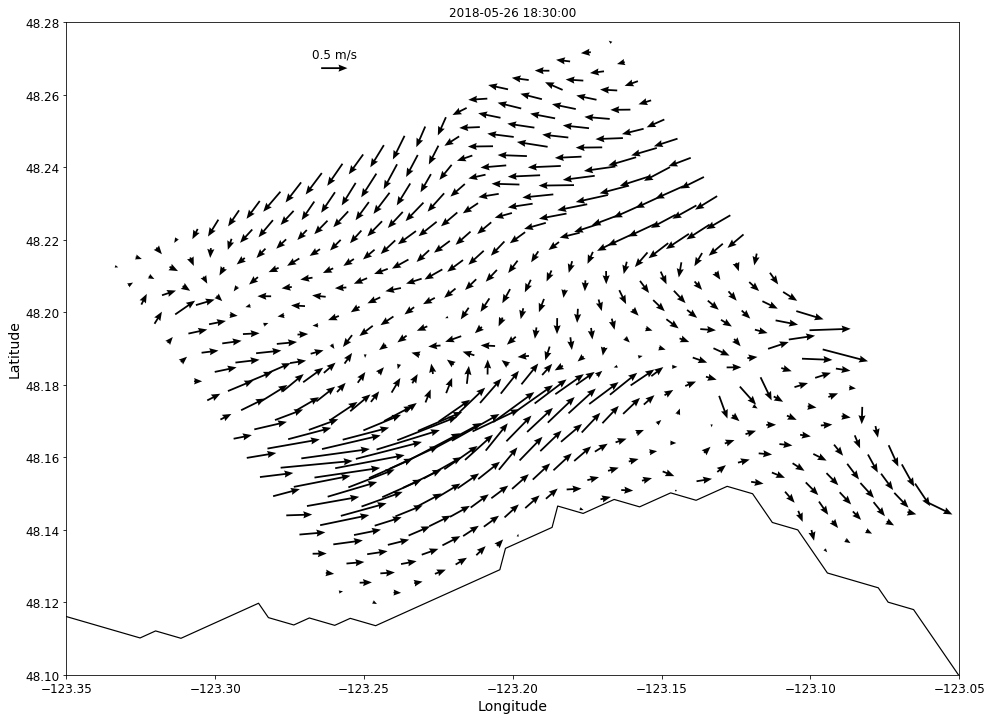

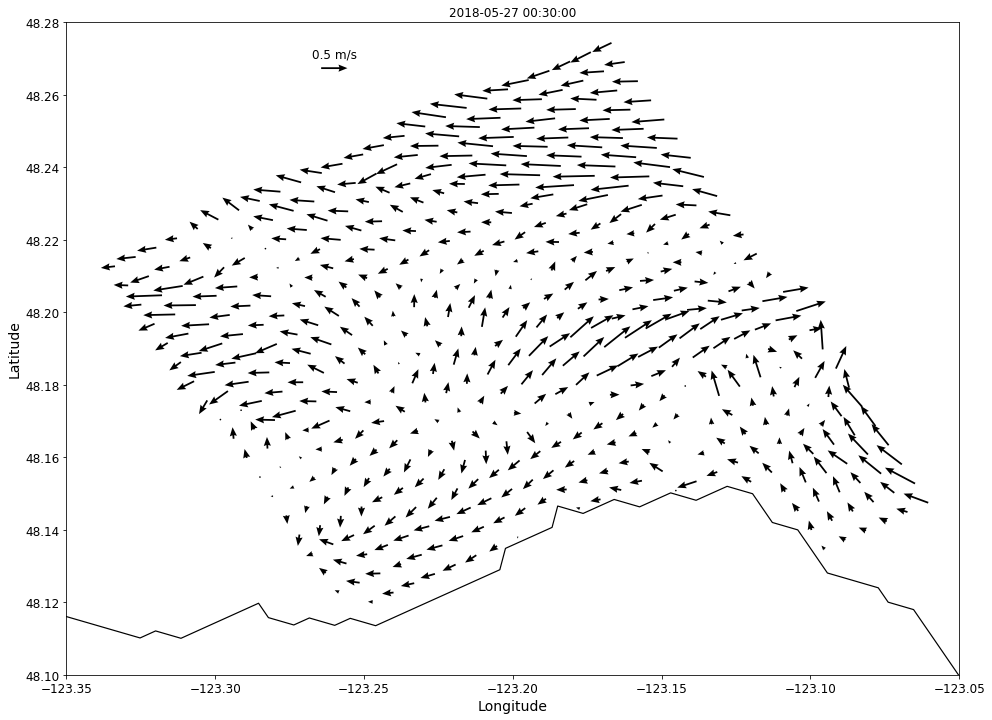

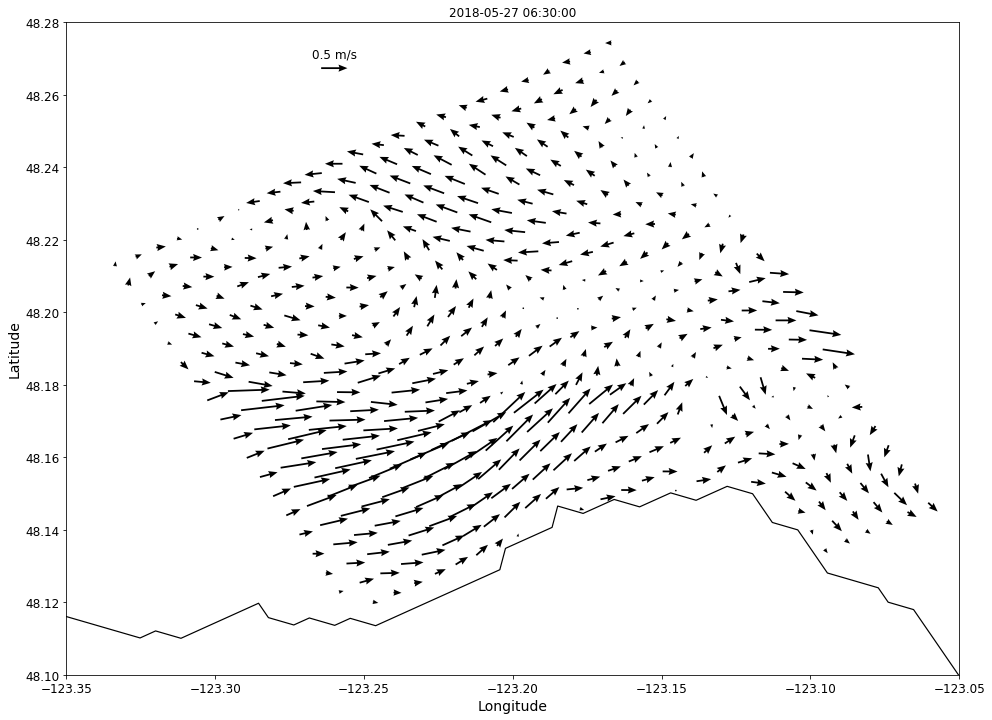

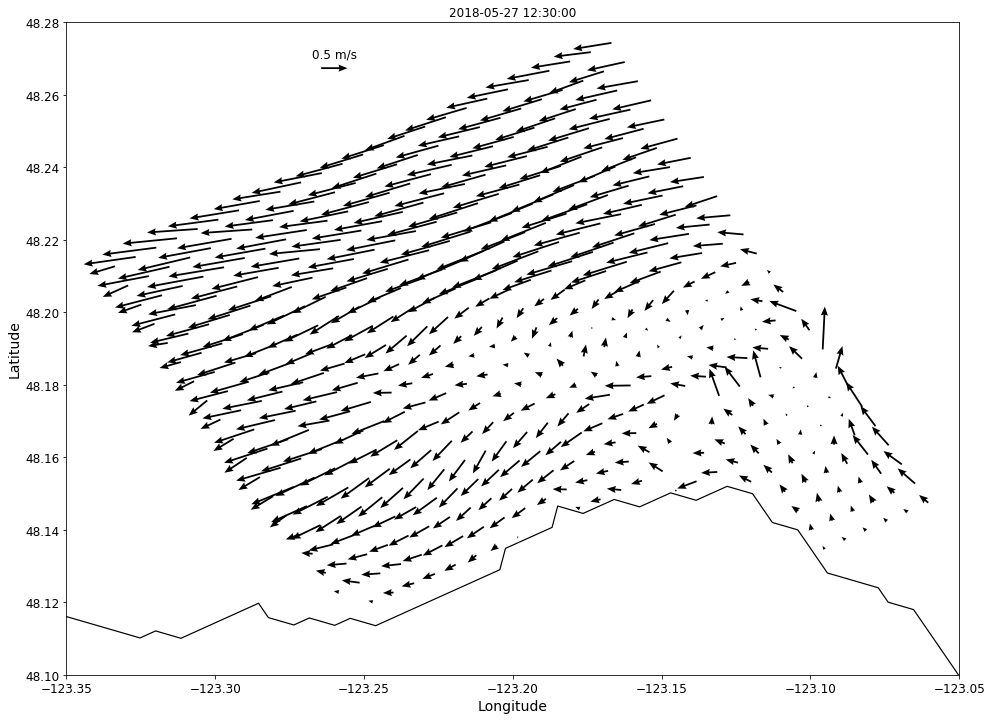

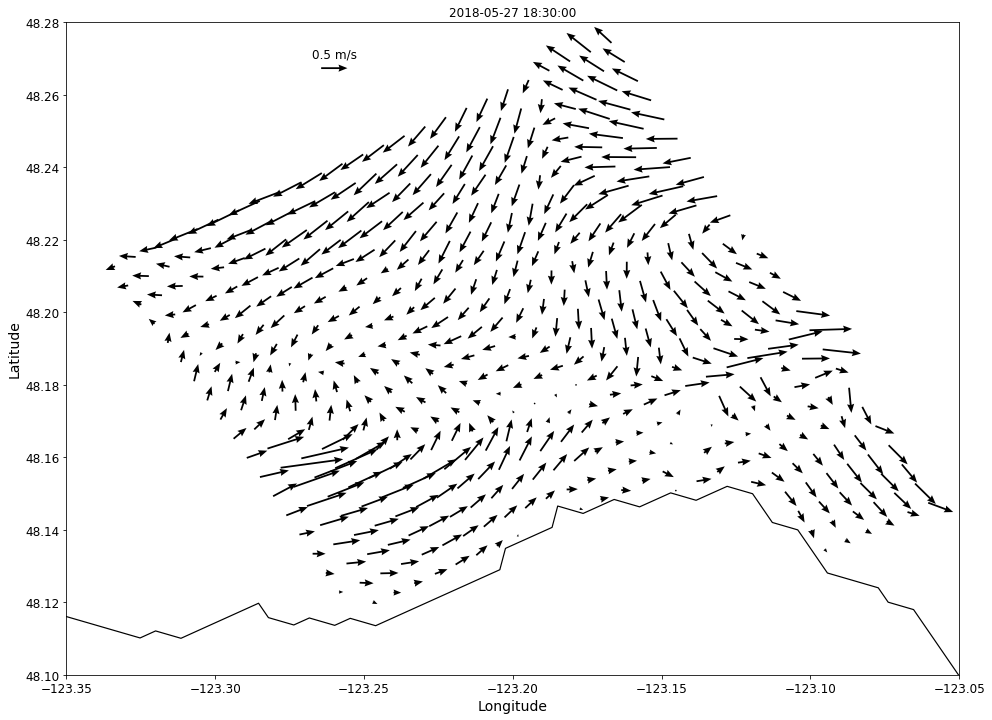

In [10]:
for n in np.arange(24,72,6):
    u = np.ma.masked_array(HS1u.variables['vozocrtx'][n,0,...], 
                        1-HS1mask.variables['tmask'][0,0,...])
    v = np.ma.masked_array(HS1v.variables['vomecrty'][n,0,...], 
                        1-HS1mask.variables['tmask'][0,0,...])
    fig,ax2 = plt.subplots( figsize=(16,12))
    u, v = viz_tools.rotate_vel(u, v)
    u, v = viz_tools.unstagger(np.expand_dims(u, 0), np.expand_dims(v, 0))
    Q=ax2.quiver(HS1mask.variables['glamt'][0, 1:101:4, 1:101:4],
                 HS1mask.variables['gphit'][0, 1:101:4, 1:101:4],
                 np.ma.masked_array(u[0,:100:4, :100:4], 
                    mask = 1 - HS1mask.variables['tmask'][0,0,1:101:4, 1:101:4]), 
                 np.ma.masked_array(v[0,:100:4, :100:4], 
                    mask = 1 - HS1mask.variables['tmask'][0,0,1:101:4, 1:101:4]),
                 scale=17, width=0.002, headwidth=4)
    Q_key = plt.quiverkey(Q, 0.3, 0.93, 0.5, '0.5 m/s')
    viz_tools.plot_coastline(ax2, grid, coords = 'map')
    ax2.tick_params(labelsize=12)
    ax2.set_xlabel('Longitude', fontsize=14)
    ax2.set_ylabel('Latitude', fontsize=14)
    ax2.set_ylim(48.1, 48.28)
    ax2.set_xlim(-123.35, -123.05)
    ax2.set_title(nc.num2date(HS1u.variables['time_counter'][n],
                              HS1u.variables['time_counter'].units));